In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.interpolate import LinearNDInterpolator
import multiprocessing

In [6]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'FreeSerif'
plt.rcParams['mathtext.fontset'] = 'cm'

# plt.rcParams.update({
#     "lines.color": "white",
#     "patch.edgecolor": "white",
#     "text.color": "black",
#     "axes.facecolor": "white",
#     "axes.edgecolor": "lightgray",
#     "axes.labelcolor": "white",
#     "xtick.color": "white",
#     "ytick.color": "white",
#     "grid.color": "lightgray",
#     "figure.facecolor": "black",
#     "figure.edgecolor": "black",
#     "savefig.facecolor": "black",
#     "savefig.edgecolor": "black"
# })

In [7]:

isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]


trace = [
    'na23',
]

color = {
    'c12': 'slateblue',
    'o16': 'orangered',
    'ne20': 'forestgreen',
    'na23': 'darkorange',
}


ls = {
    'c12': 'solid',
    'o16': 'dashed',
    'ne20': 'dotted',
    'na23': 'solid',
}


labels = {
    'c12': '$^{12}$C',
    'o16': '$^{16}$O',
    'ne20': '$^{20}$Ne',
    'na23': '$^{23}$Na',
}

In [8]:
m = 9
g = -10
key = f'm{m:04.1f}_g{g:+04.2f}_0'
index = pd.read_csv(f'csv/{key}/index.csv')
t = np.array(index["time to core O depletion (years)"])
N = np.array(index["surface num_a (/s)"])
slices = [ pd.read_csv(f'csv/{key}/slice_{int(i)}.csv') for i in index["slice"] ]

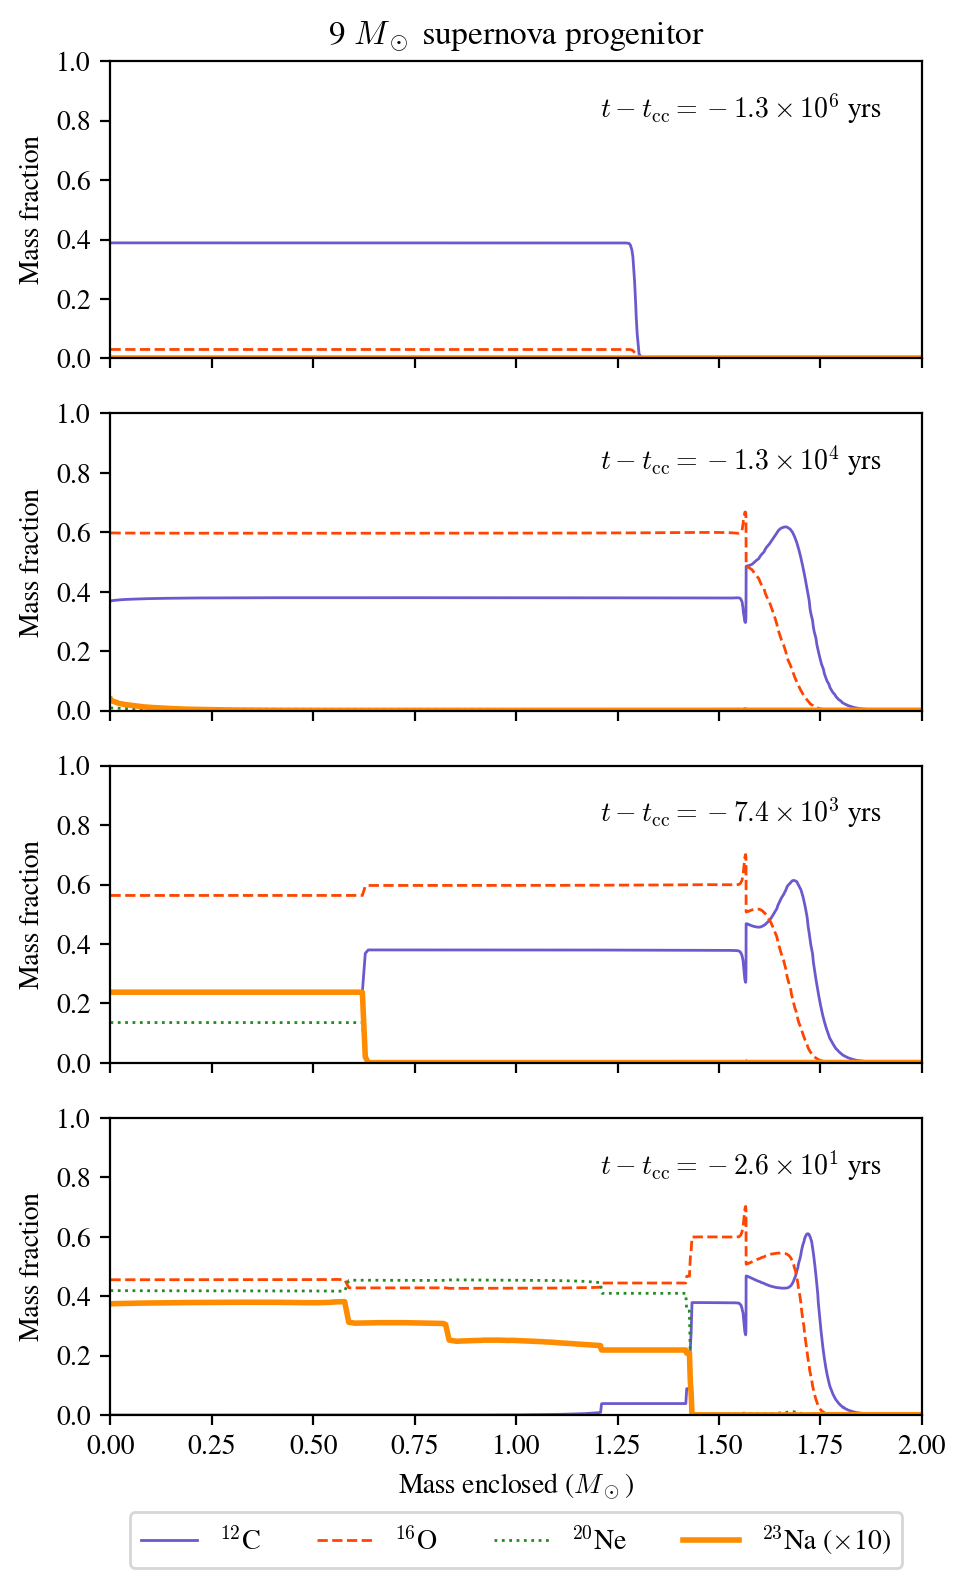

In [68]:
ii = [1000, 1380, 1500, 2200]
fig, axs = plt.subplots(nrows=len(ii), figsize=(5,2*len(ii)), sharex=True, sharey=True)

for (j, i) in enumerate(ii):
    plt.sca(axs[j])
    plt.ylabel("Mass fraction")
    s = slices[i]
    m = np.array(s["mass enclosed (Msun)"])
    plt.text(1.9, 0.9, f'$t - t_\\mathrm{{cc}} = -{t[i]/10**np.floor(np.log10(t[i])):.1f}\\times10^{{{np.floor(np.log10(t[i])):.0f}}}$ yrs',
            horizontalalignment='right',
            verticalalignment='top')
    for iso in isotopes:
        mul = 10 if iso in trace else 1
        label = labels[iso]
        lw = 1
        if iso in trace:
            label += f' ($\\times${mul:.0f})'
            lw += 1
        plt.plot(m, mul * np.array(s["X_"+iso]), label=label, c=color[iso], ls=ls[iso], lw=lw)

plt.sca(axs[0])
plt.title('9 $M_\odot$ supernova progenitor')

plt.sca(axs[-1])
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.legend(loc='upper center',ncol=5, bbox_to_anchor=(0.5, -0.28))
plt.xlabel("Mass enclosed ($M_\odot$)")
plt.tight_layout()

In [10]:

fig, (tax, Xax) = plt.subplots(nrows=2, figsize=(12, 9*0.75), gridspec_kw={'height_ratios': [1, 3]})
Tax = Xax.twinx()


for (i, s) in enumerate(slices):
    # if i not in (iCstart, iCend):
    #     continue

    if i % 100 == 0:
        print(i)

    plt.sca(tax)
    tax.set_facecolor('black')
    tax.set_yscale('log')
    tax.set_xscale('log')
    plt.plot(t, N, c='white')
    plt.axvline(t[i], c='gray')
    plt.ylim(1e20, 1e50)
    plt.xlim(np.max(t), 1e-1)
    plt.title("Axion flux from a 9 $M_\odot$ star with $g_{eff} = 10^{-10}$", c="white")
    plt.xlabel("years to core collapse")
    plt.ylabel("axions/sec")
    plt.grid(c="gray", ls=":")
    
    plt.sca(Xax)
    Xax.set_facecolor('black')
    Xax.set_yscale('log')

    m = np.array(s["mass enclosed (Msun)"])

    for iso in isotopes:
        plt.plot(m, np.array(s["X_"+iso]), label=iso, c=color[iso])

    plt.ylim(1e-4, 1)
    plt.xlim(0, 9)
    plt.xlabel("Mass enclosed ($M_\odot$)")
    plt.ylabel("Isotope mass fraction")
    plt.grid(c="gray", ls=":")
    plt.legend(labelcolor='white', facecolor='black')

    plt.sca(Tax)
    Tax.set_yscale('log')
    plt.plot(m, np.array(s["T (K)"]), ls="--", c='white')
    plt.ylim(1e5, 1e10)
    plt.ylabel("Temperature (K)")
    plt.tight_layout()


    plt.savefig(f'slice3/{i:05}.png')
    tax.clear()
    Xax.clear()
    Tax.clear()

0


FileNotFoundError: [Errno 2] No such file or directory: '/home/xingyzt/Documents/salty-axions/sn/slice3/00000.png'

Error in callback <function flush_figures at 0x7e7230b29e10> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 